## What is TensorFlow?

TensorFlow is used for many deep learning applications. It is used to take data and then make predictions in numerous areas of study. 

Using a bunch of numbers to predict another number

Example : Does the size, # of bathrooms, etc. effect the value of a house? Based on those variables can we make predictions about the price?

In Machine Learning algorithms are trained to understand relationships between variables and make predictions about outcomes of dependent variables.

You plot a regression line that best fits through data points. You do this by finding a mean between points. Often outcomes can be predicted based on unseen data.

- Input Neurons : Number of features used by a neural network to make predictions
- Hidden Layers : Application of weightings to inputs to provide desired outputs
- Output Neurons : Predictions the neural network makes

## What is a Tensor?

We need to represent our data numerically. Pink has no meaning as input, but .1 Red, .075 Green, and .079 Blue does if represented as [.1, .075, .079]

The following are all tensors

- [.1, .075, .079] is called a vector
- [1] is a scalar
- Matrix is a multidimensional array
- Tensor is a multidimensional array of vectors

## How to Improve Our Models

- Fit on more data
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data

## Imports

In [2]:
# pip install tensorflow
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

# Import NumPy
import numpy as np

# pip install pandas
import pandas as pd

# pip install seaborn
import seaborn as sns

# pip install matplotlib
import matplotlib.pyplot as plt

# pip install -U scikit-learn
# Used to split data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Multiple math functions
from tensorflow import math

from keras.utils.vis_utils import plot_model

# Test if using TensorFlow GPU
if(tf.config.list_physical_devices('GPU')):
    print("Yes")

Yes


## Google Colab Fundamentals

This is a cell. 
- Change to Markdown Cell : ESC -> m -> Enter
- Change to a Code Cell : ESC -> y -> Enter
- Run Code in Cell : Ctrl + Enter
- Exit Markdown Cell : Shift + Enter
- Create Cell Above Current : ESC -> a
- Create Cell Below Current : ESC -> b
- Delete Current Cell : Select it -> dd
- Undo Cell Deletion : z
- Merge Cells : Select cell -> Shift -> Up/Down Arrow -> Shift + m

## Download Data

In [3]:
# Import nba data (Click raw on GitHub and copy that URL)
nba_data = pd.read_csv(
    "https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")

nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


## Delete Unknown Values

In [4]:
# Check for nans in columns
nba_data.isna().sum()

# This deletes all of them
# nba_data = nba_data.dropna()
nba_data

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Dylan,Windler,CLE,2239200.0,SF,25,50,0,459,37,...,0.833,21,68,89,34,14,3,16,47,110
285,Christian,Wood,HOU,13666667.0,C,26,68,67,2094,440,...,0.623,110,576,686,155,54,65,126,171,1218
286,Delon,Wright,ATL,8526316.0,SG,29,77,8,1452,122,...,0.857,50,170,220,188,93,19,45,56,342
287,Omer,Yurtseven,MIA,1489065.0,C,23,56,12,706,130,...,0.623,85,209,294,49,17,20,41,84,299


## Delete Unneeded Data

In [5]:
# Delete non-numeric data (Changes don't effect the original)
nba_data_numeric = nba_data.copy()
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]

nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


## Convert Currency to Float

In [6]:
def clean_currency(x):
    """ If is a string remove $ and delimiters and
    otherwise the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [7]:
nba_data_numeric["salary"] = nba_data_numeric['salary'].apply(clean_currency).astype('float')
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [8]:
# Get Shape
print(np.shape(nba_data_numeric))

(289, 27)


In [9]:
# Summarize the data
print(nba_data_numeric.describe())

             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.231000    0.000

## Box Plots

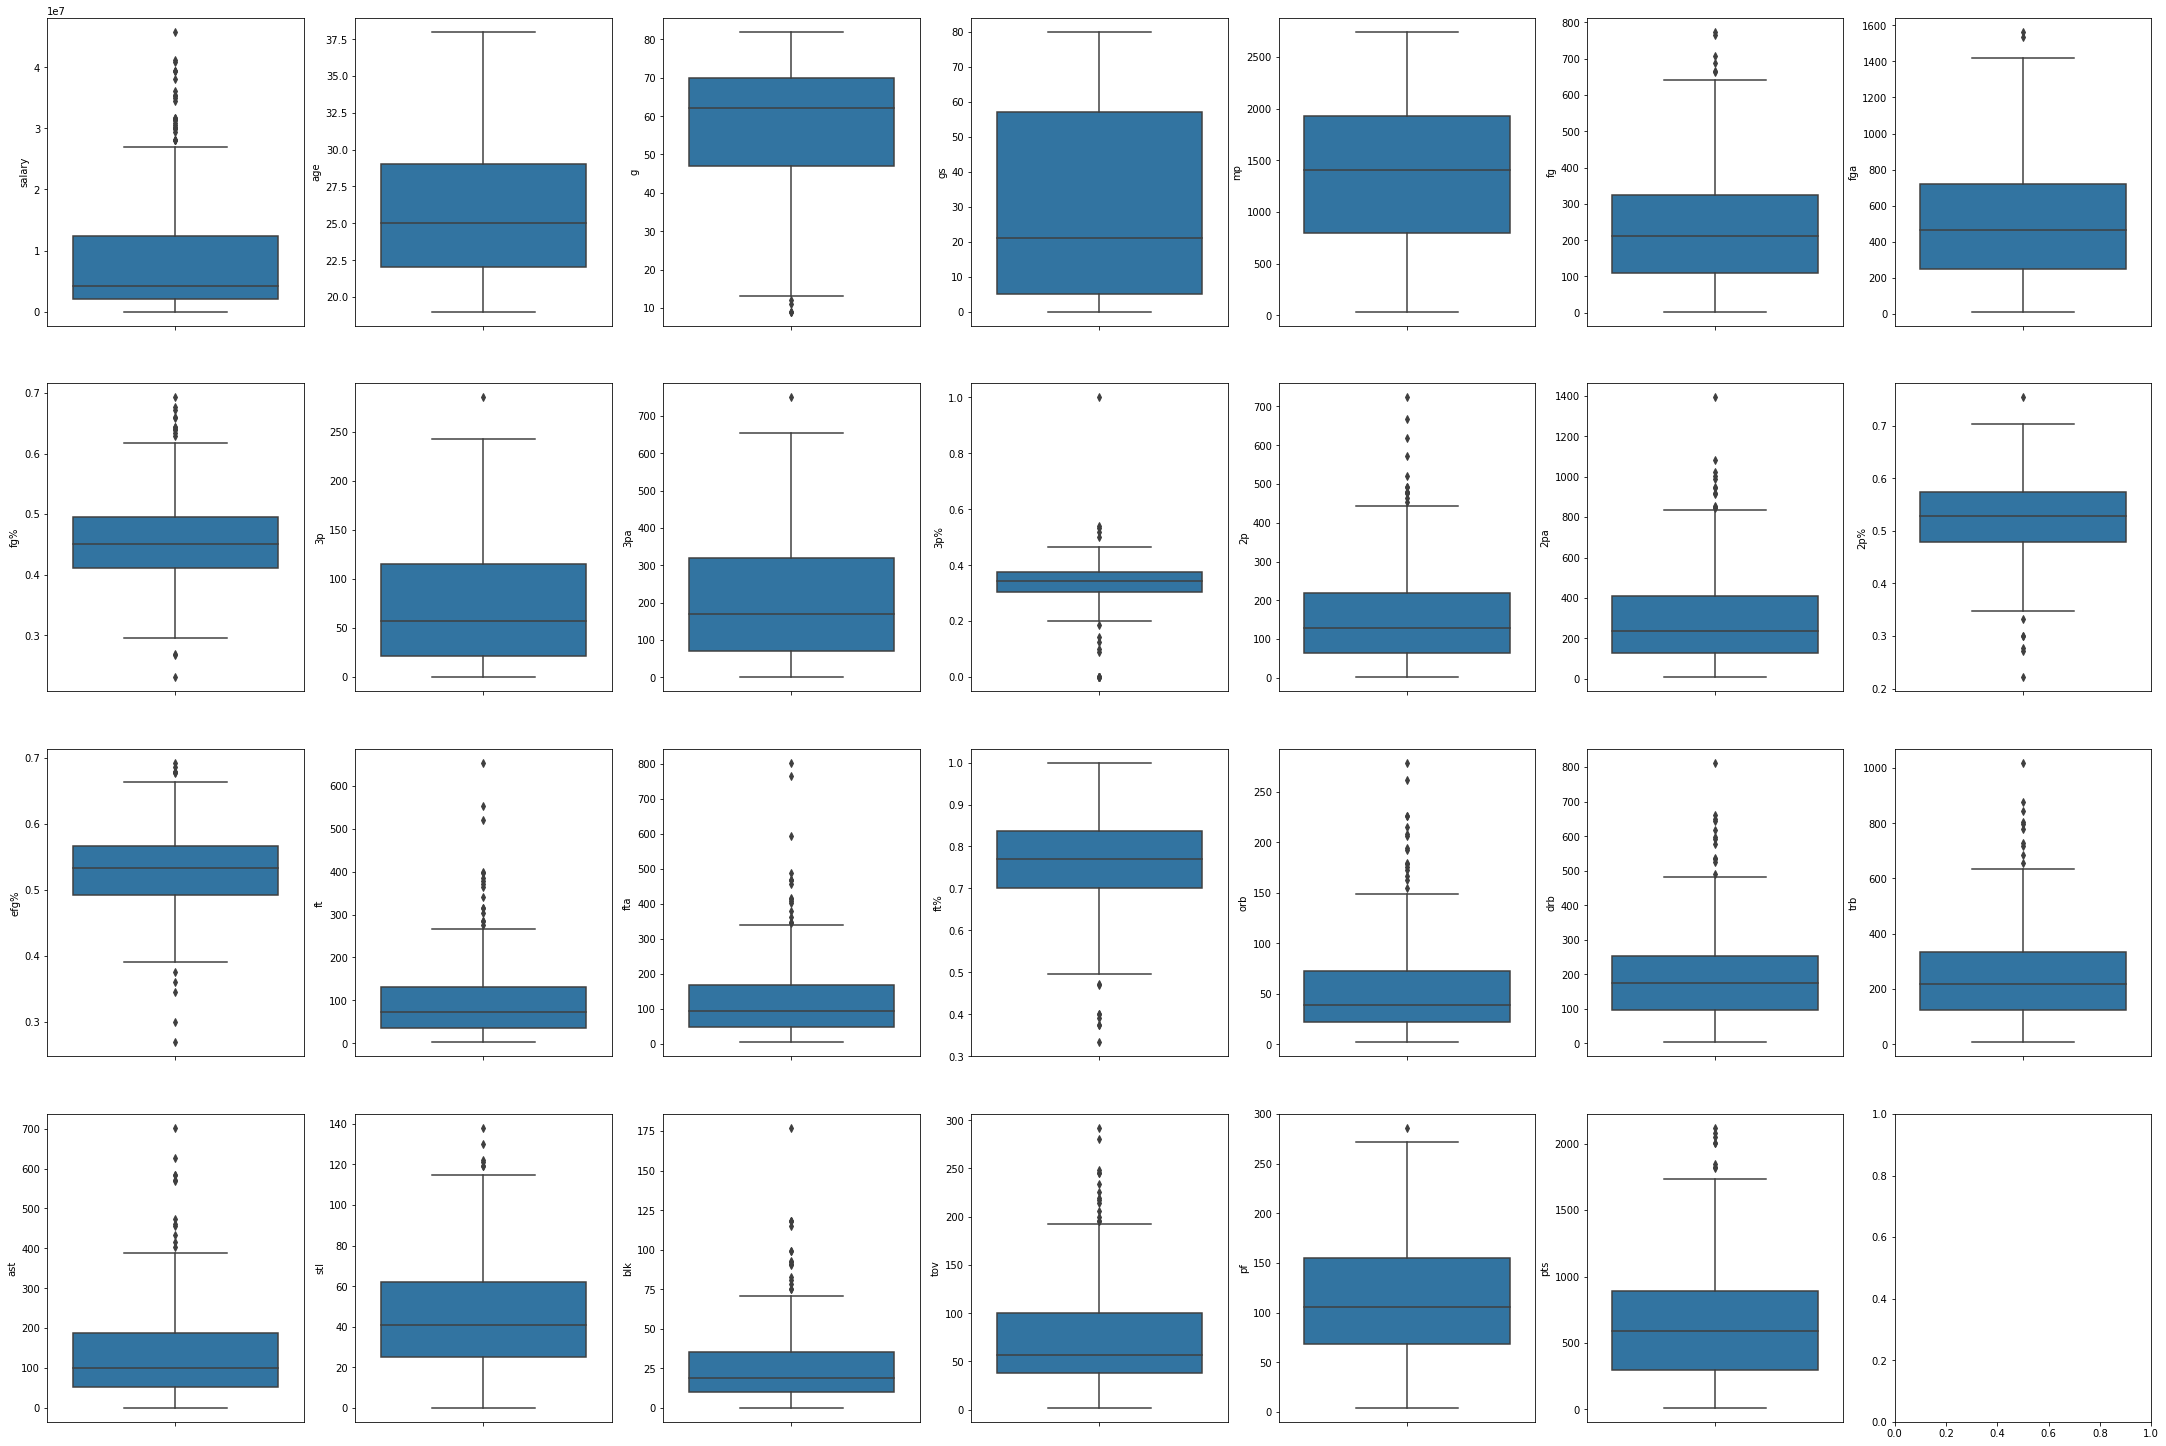

In [10]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in nba_data_numeric.items():
    # sns.boxplot(y=k, data=nba_data, ax=axs[index])
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Outliers are extreme values that differ from the vast majority of the data.
# They can have a big impact on the results of your hypothesis
# Since salary is what we are interested in and it has many outliers that could be an issue

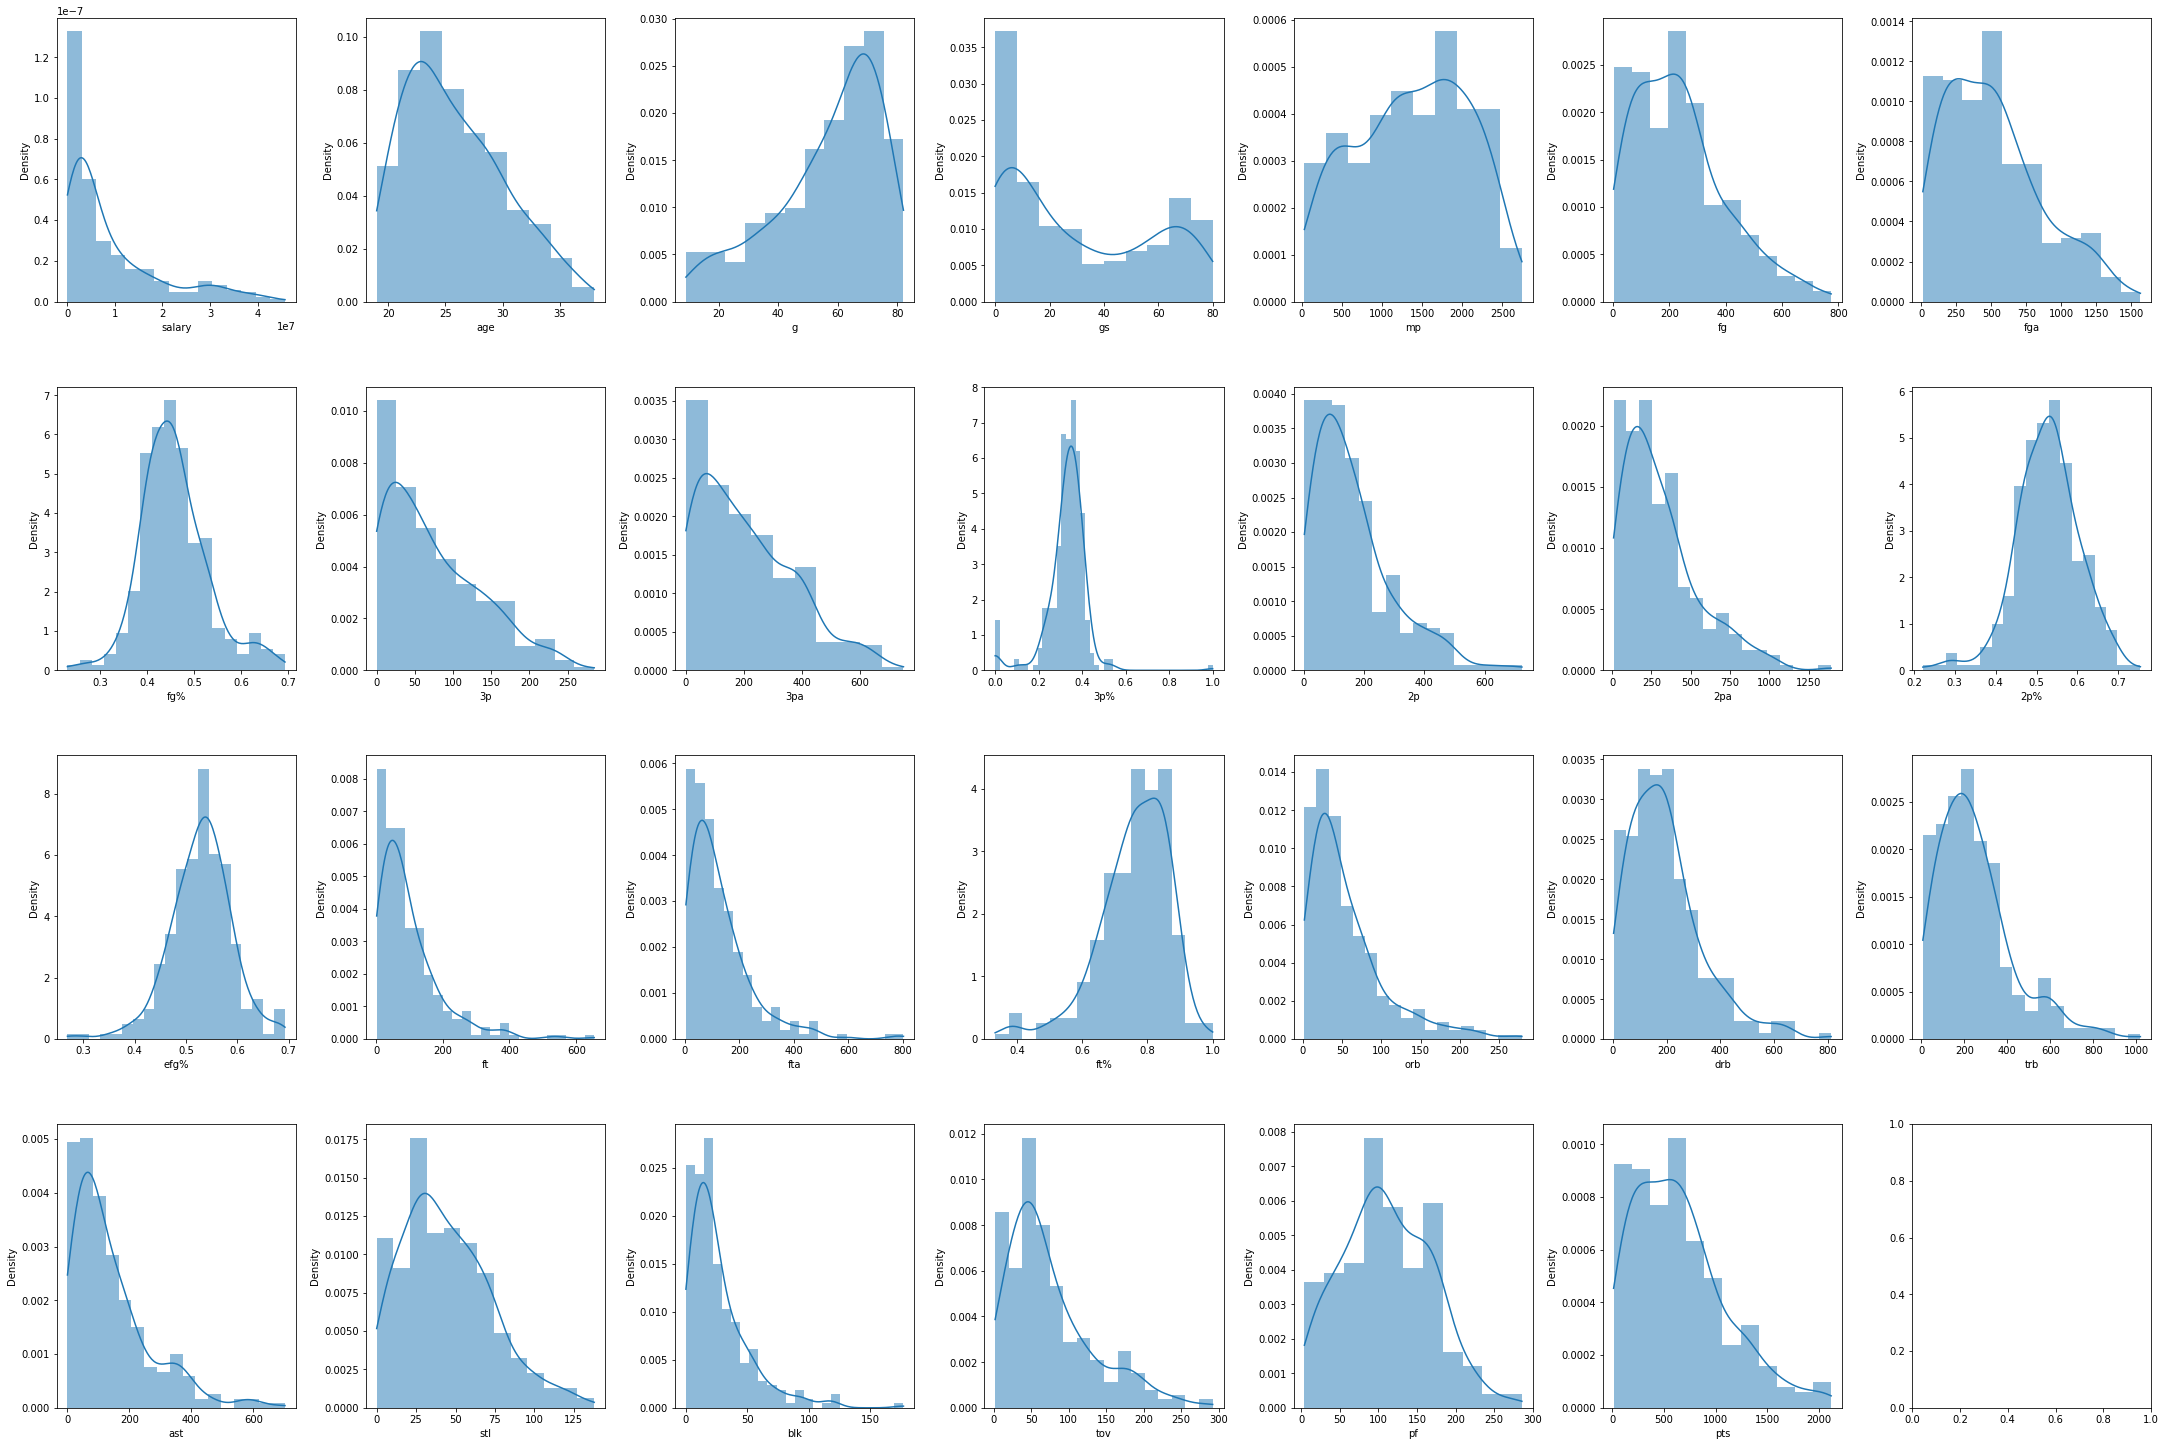

In [11]:
# We can use histogram plots to analyze how values are distributed into discrete bins
# If you want to predict a label based on features both should have similar histogram plots
# Data with a normal distribution (data is symmetric about the mean) is the easiest to work with
# because it doesn't have as many outliers
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in nba_data_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Correlation Matrix

<AxesSubplot:>

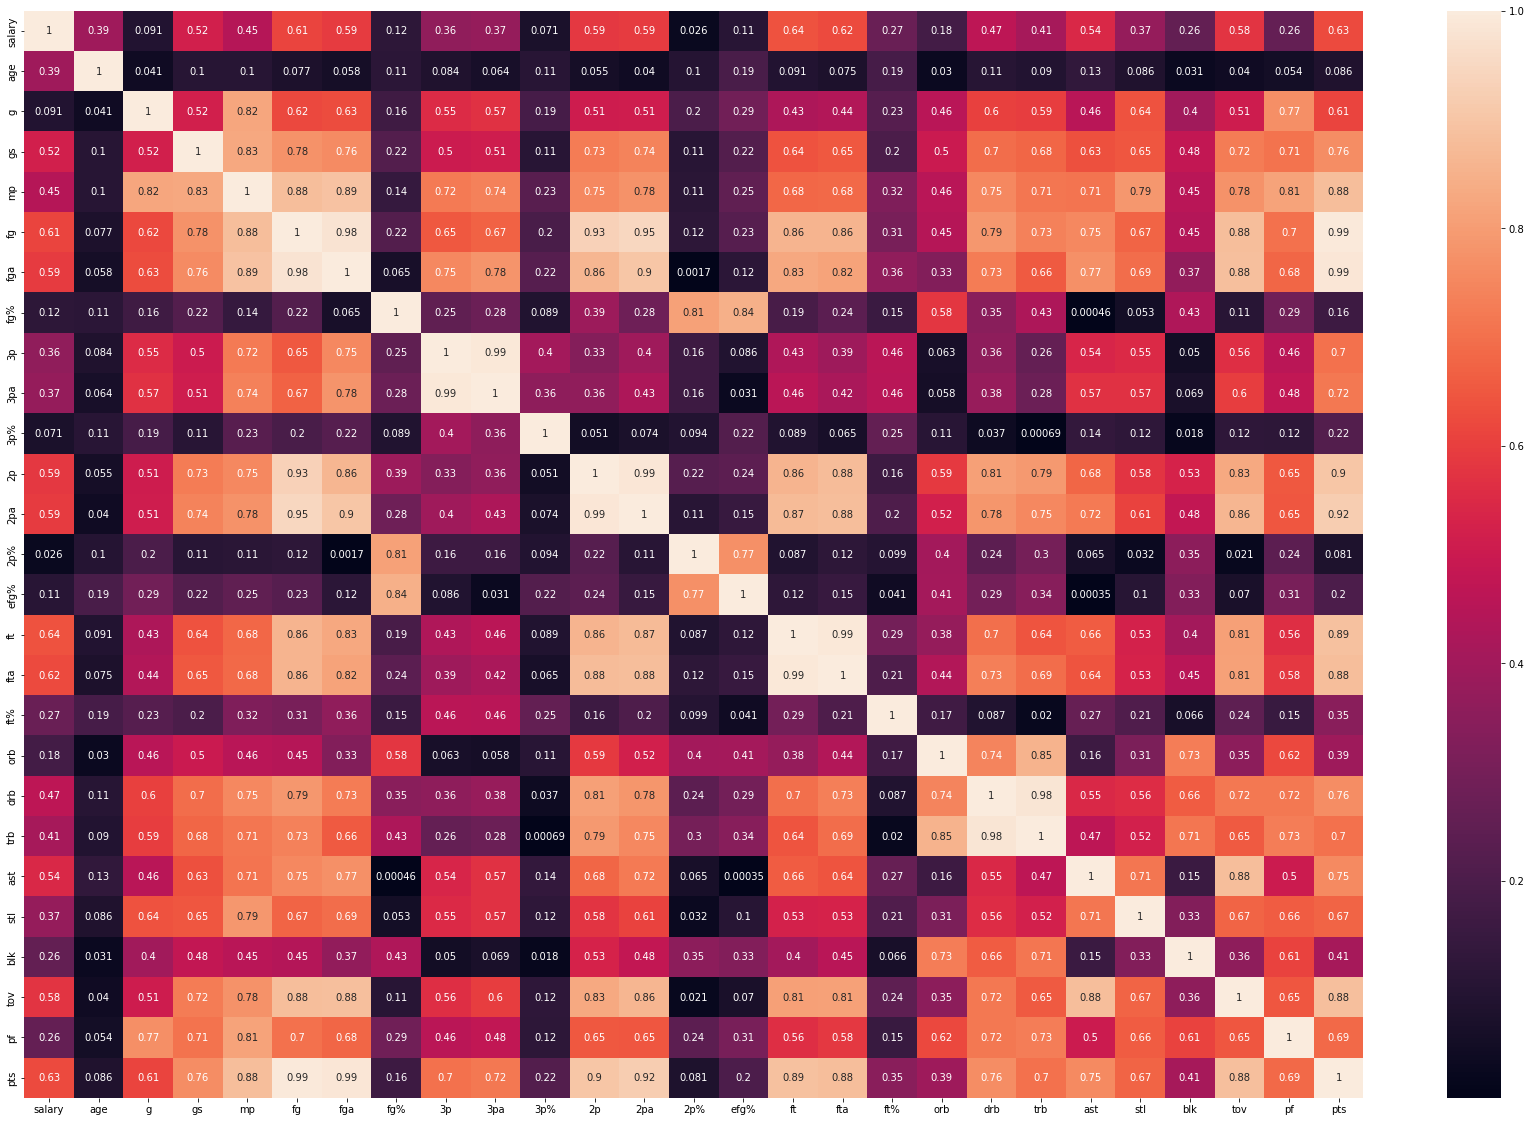

In [12]:
# When we say data is correlated that means the data is related to each other. When a feature moves in a
# certain direction a label also tends to move in that same direction
plt.figure(figsize=(30, 20))
sns.heatmap(nba_data_numeric.corr().abs(),  annot=True)
# High correlation between fg, ft, fta, tov, pts

## Get Percentage of Outliers

In [13]:
# The Interquartile range tells you the range of the middle half for your dataset
# You use it to define fences around your data which allow you to find the percentage 
# of outliers in your data
for k, v in nba_data_numeric.items():
        # Identify the 1st quartile
        q1 = v.quantile(0.25)
        # Identify the 3rd quartile
        q3 = v.quantile(0.75)
        # Get your interquartile range
        iqr = q3 - q1
        # Lower fence is q1 - (1.5 * iqr)
        # Upper fence is q3 + (1.5 * iqr)
        # Store outliers if they are above these fences
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        # Calculate the percentage of total outliers
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
        print("%s Outliers = %.2f%%" % (k, perc))

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


## Tensorflow Neural Network Regressions

Regressions : Used to determine relationships between different features to make predictions

Using numbers to predict another number

Example : Does the size, # of bathrooms / bedrooms, etc. effect the value of a house? Based on those variables can we make predictions about the price?

In Machine Learning algorithms are trained to understand relationships between features and make predictions about labels

You plot a regression line that best fits through data points. You do this by finding a mean between points. Often outcomes can be predicted based on unseen data.

## Tensors

## Create Constant Tensor

In [14]:
# Create a constant tensor thats value can't be changed
# Scalar : a single number
scalar = tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

## Create a Vector

In [15]:
# Create a vector
# Vector : Number with direction
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

## Create a Matrix

In [16]:
# Create a matrix
# Matrix : 2D array of numbers
matrix = tf.constant([[1,2], [3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## Create a Tensor

In [17]:
# Create a 3d matrix (Tensor)
# n dimensional array of numbers
tensor = tf.constant([[[1,2,3,], 
[4,5,6]], 
[[7,8,9],
[10,11,12]],
[[13,14,15],
[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

## Create Tensor that can be Changed

In [18]:
# Create a vector thats value can be changed
# Normally we create constant tensors
v_tensor = tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6])>

## Get & Change Values

In [19]:
print("Index 0 :", v_tensor[0])

# Change value in first index
v_tensor[0].assign(8)
print("Index 0 :", v_tensor[0])

Index 0 : tf.Tensor(5, shape=(), dtype=int32)
Index 0 : tf.Tensor(8, shape=(), dtype=int32)


## Random Tensors

In [20]:
# You commonly initialize with random weights to begin an analysis
# Seed is used so that we can get the same random later

# You can set a global seed and it will make all random generations the same
# tf.random.set_seed(66)

rand_tensor = tf.random.Generator.from_seed(66)
# Generate values that are near the mean 0 (These values create a bell curve)
# 3 rows and 2 columns
rand_tensor = rand_tensor.normal(shape=(3,2), mean=0.0, stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

## Turn Numpy Array into Tensor

In [21]:
# Generate values from 1 to 24
np_array = np.arange(1,25,dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [22]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

## Change Shape of Tensor

In [23]:
# Change shape of tensor (6 * 2 * 2 = 24)
tensor3 = tf.constant(np_array, shape=(6,2,2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]])>

## Get Info on Tensors

In [24]:
# First index
print("Index 0 :", tensor3[:1])
# Shape : number of values of each dimension
print("Values in Dims :", tensor3.shape)
# Rank : number of tensor dimensions (Scalar = 0, Vector = 2, etc)
print("Dimensions :", tensor3.ndim)
# Size : total values in tensor
print("Total Values :", tf.size(tensor3).numpy())
# Get data type
print("Data Type :", tensor3.dtype)

Index 0 : tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in Dims : (6, 2, 2)
Dimensions : 3
Total Values : 24
Data Type : <dtype: 'int32'>


## Matrix Multiplication

DOT PRODUCT : Matrix Multiplication

Multiply matching numbers and sum them
Take each row in the left matrix, multiply it by the columns in the right matrix and sum
- Multiply and sum 1st row and 1st column (Position 0, 0)
- 1st row and 2nd column (Position 0, 1)
- 2nd row and first column (Position 1, 0)
- 2nd row and 2nd column (Position 1, 1)

$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \quad
x  \quad
\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} \quad
=  \quad
\begin{bmatrix} 1*1 + 2*3 + 3*5 & 1*2 + 2*4 + 3*6 \\ 4*1 + 5*3 + 6*5 & 4*2 + 5*4 + 6*6 \end{bmatrix} \quad
= \quad
\begin{bmatrix} 22 & 28 \\ 49 & 64 \end{bmatrix}
$$

The dimension of the resulting matrix with be the number of rows from 1st (2x3) and the number of columns from the 2nd (3x2) matrix

You can only perform this calculation if the 1st matrix has an equal number of columns to the number rows in the 2nd

## Why is Matrix Multiplication Useful

Let's say these are sales at our ice cream store

| Flavor | Sat  | Sun | Tues | Wed | Thr | Fri |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Choc | 26 | 27 | 22 | 10 | 12 | 33 |
| Van | 18 | 21 | 10 | 8 | 4 | 26 |
| Straw | 9 | 20 | 4 | 9 | 7 | 16 |
| Chip | 24 | 19 | 12 | 8 | 6 | 14 |

And this is how much each ice cream costs

| Choc | Van  | Straw | Chip | 
| :---: | :---: | :---: | :---: |
| $3 | $2 | $4 | $4 |

We can find earnings on each day with matrix multiplication

In [25]:
# Ice cream sales (4x6)
ic_sales = tf.constant([[26, 27, 22, 10, 12, 33],
                        [18, 21, 10, 8, 4, 26],
                        [9, 20, 4, 9, 7, 16],
                        [24, 19, 12, 8, 6, 14]])
ic_sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[26, 27, 22, 10, 12, 33],
       [18, 21, 10,  8,  4, 26],
       [ 9, 20,  4,  9,  7, 16],
       [24, 19, 12,  8,  6, 14]])>

In [26]:
# Ice cream prices (1, 4)
ic_price = tf.constant([[3,2,4,4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]])>

In [27]:
# So we multiply prices (1,4) by sales (4x6)
tf.matmul(ic_price, ic_sales)
# Sat Sales = 3*26 + 2*18 + 4*9 + 4*24 = 246

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]])>

## Normalize and One Hot Encode Our Data

We will convert our non-numeric data into numbers but all of our data is on different scales. We normalize our data so that it is using a common scale. We can do this while also not distorting the differences in the wide range of values. We will convert all values to between 0 and 1 while preserving the original distribution.

We do this because machine learning algorithms work better when features have a similar scale.

In [28]:
# We need to take our columns and transform them before passing them into our neural network
# We will transform our provided features between 0 and 1

# Non-numeric data must be turned into numbers (Numeric Encoding) for analysis
# How to One Hot Encode a Pandas Dataframe
# A categorical feature becomes an array whose size is the number of possible
# choices for those features

# Features : "age", "g", "gs", "mp", "fg", "fga", "fg%", "3p", "3pa", "3p%", "2p", "2pa", "2p%", "efg%", "ft", "fta", "ft%", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts", "pos", "team"

''' BASIC
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "pts"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["pos"]) # One hot encode these columns (pos, team)
)
'''

''' NBA Efficiency
ct = make_column_transformer(
    (MinMaxScaler(), ["pts", "trb", "ast", "stl", "blk", "fg%", "ft%", "tov", "g"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["pos"]) # One hot encode these columns (pos, team)
)
'''

''' Everything
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "g", "gs", "mp", "fg", "fga", "fg%", "3p", "3pa", "3p%", "2p", "2pa", "2p%", "efg%", "ft", "fta", "ft%", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["team", "pos"]) # One hot encode these columns (pos, team)
)
'''

# High correlation features fg, ft, fta, tov, pts
ct = make_column_transformer(
    (MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts"]), # Normalize these columns
)

## Separate Features & Labels

In [29]:
X = nba_data.drop("salary", axis=1) # Features
y = nba_data["salary"] # Labels

## Separate Training & Testing Data

In [30]:
# Build train (80%) & test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

## Transform Training & Test Data

In [31]:
# Transform training data 
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## Our New Normalized and One Hot Encoded Data

In [32]:
X_train_normal

array([[0.0843061 , 0.04141104, 0.04380476, 0.1       , 0.07787274],
       [0.66018158, 0.46165644, 0.49687109, 0.83793103, 0.68138651],
       [0.44747082, 0.25613497, 0.24906133, 0.45862069, 0.43494777],
       ...,
       [0.47600519, 0.1196319 , 0.20650814, 0.14482759, 0.38366572],
       [0.29442283, 0.16104294, 0.1514393 , 0.28965517, 0.32573599],
       [0.17250324, 0.06748466, 0.07133917, 0.14827586, 0.15337132]])

## Build Neural Network with Training Data

In [37]:
# Set random seed so we can reproduce our results
tf.random.set_seed(66)

# Neurons are nodes through which data and computations flow. 

# Activation functions help our network decide what is important data.
# They receive data and add weightings to it and pass the results to other hidden layers
# Depending on the error value the weights are updated
# Without activation functions our system is just a simple regression model
# relu (Rectified Linear Unit) is a function that is computationally efficient

# Create model and sequentially go through data
nba_model = tf.keras.Sequential([
  # 4 hidden layers with 3 having 100 neurons (Outputs)
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model (Calc errors, optimize and evaluate)
# Mean Absolute Error : Finds the average of the errors between predictions and 
# observed data (How incorrect are our predictions)
# Stochastic Gradient Descent : Optimizes our guesses by smoothing the predictions 
# to the observed data 
# Metrics test the accuracy of the model
nba_model.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Take the data and try to fit the data with 100 tries creating a trained model
# Fit the model for 200 epochs (Save so we can plot this)
# An epoch is a full iteration over the training data
fit_data = nba_model.fit(X_train_normal, y_train, epochs=100, verbose=0) 

In [38]:
# Evaulate NBA model
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 18ms/step - loss: 4600969.0000 - mae: 4600969.0000


## Plot to see How Increasing Epochs Decreases Loss

<AxesSubplot:xlabel='Epochs', ylabel='Loss'>

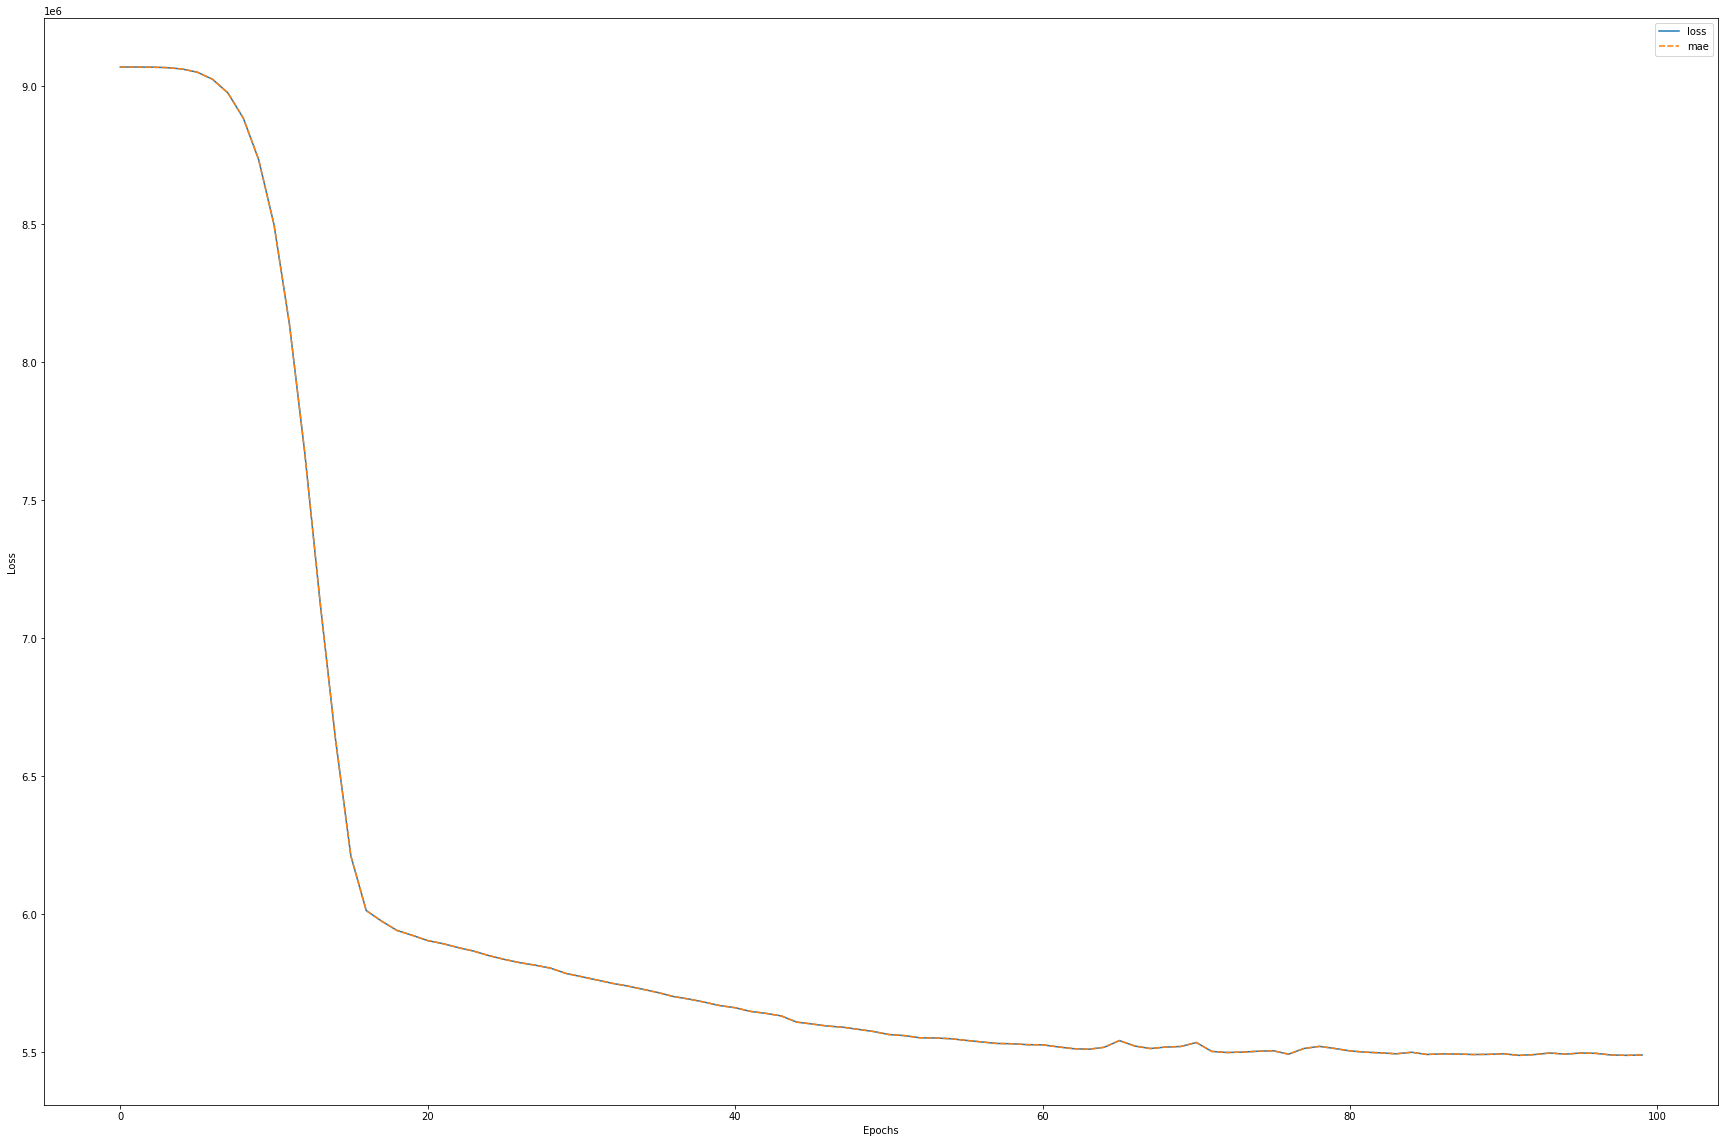

In [39]:
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epochs");
sns.lineplot(data=fit_data.history)

In [36]:
# Show the layers the output shape and the number of parameters for each layer
# Trainable Params : Model updates these as it trains
# Non-trainable Params : Not updated during training (Outside Patterns from other Models)
nba_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


## How Can we Improve our Model?

- Fit on more data
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data